In [ ]:
# Instala as bibliotecas necessárias
%pip install yfinance
%pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.1 MB/s eta 0:00:00


In [ ]:
 # Importa as bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# Baixa os dados históricos de fechamento para a ação WEGE3.SA
base_treinamento = yf.download('WEGE3.SA', start="2023-01-01", end="2024-01-01", progress=False)['Close']
# Remove eventuais valores nulos
base_treinamento = base_treinamento.dropna()
# Normaliza os valores para a faixa de 0 a 1
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento.values.reshape(-1, 1)) # Ajuste para reshape

/tmp/ipython-input-2552581255.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  base_treinamento = yf.download('WEGE3.SA', start="2023-01-01", end="2024-01-01", progress=False)['Close']


In [ ]:
previsores = []
preco_real = []
# Cria as sequências de entrada (previsores) e as saídas correspondentes (preco_real)
# A janela de tempo é de 90 dias
for i in range(90, len(base_treinamento_normalizada)): # Ajusta o range para usar o tamanho da base normalizada
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
# Transforma as listas em arrays numpy e ajusta o formato para o treinamento da rede
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [ ]:
# Define a arquitetura da rede neural MLP (Multi-layer Perceptron)
regressor = Sequential()
# Adiciona a camada de entrada e a primeira camada oculta
regressor.add(Dense(units = 100, activation = 'relu', input_shape = (previsores.shape[1],))) # Use input_shape para a primeira camada Dense
# Adiciona uma camada de Dropout para regularização
regressor.add(Dropout(0.3))
# Adiciona a segunda camada oculta
regressor.add(Dense(units = 50, activation = 'relu'))
# Adiciona outra camada de Dropout
regressor.add(Dropout(0.3))
# Adiciona a camada de saída
regressor.add(Dense(units = 1, activation = 'linear'))

# Compila o modelo
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
# Treina o modelo com os dados preparados
regressor.fit(previsores, preco_real, epochs = 1000, batch_size = 32)

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3719 - mean_absolute_error: 0.4974  
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2041 - mean_absolute_error: 0.3586 
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1177 - mean_absolute_error: 0.2747 
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0609 - mean_absolute_error: 0.1991  
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0566 - mean_absolute_error: 0.1949 
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.1665 
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.1654 
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0335 - mean_absolute_error: 0.1455 
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0381 - mean_absolute_error: 0.1453 
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.1504 
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Compila o modelo (repetido, pode ser removido ou usado para recompilar com outros parâmetros se necessário)
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
# Treina o modelo novamente (repetido, pode ser removido ou usado para continuar o treinamento)
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0814
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - mean_absolute_error: 0.0841
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0144 - mean_absolute_error: 0.0943
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - mean_absolute_error: 0.0797 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0162 - mean_absolute_error: 0.0937 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116 - mean_absolute_error: 0.0847 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0114 - mean_absolute_error: 0.0811
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - mean_absolute_error: 0.0883 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121 - mean_absolute_error: 0.0875 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0140 - mean_absolute_error: 0.0873
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

In [ ]:
# Baixa os dados históricos de fechamento para o período de teste
base_teste = yf.download('WEGE3.SA', start="2024-01-01", end="2024-06-01", progress=False)['Close']
# Remove eventuais valores nulos na base de teste
base_teste = base_teste.dropna()
# Normaliza os valores da base de teste (usando um novo normalizador para evitar vazamento de dados)
normalizador_teste = MinMaxScaler(feature_range=(0,1))
base_teste_normalizada = normalizador_teste.fit_transform(base_teste.values.reshape(-1, 1)) # Ajuste para reshape


# Para fazer previsões, precisamos das últimas 90 entradas dos dados de treino para começar os testes.
# Concatenamos as bases de treino e teste para obter a sequência completa necessária para criar as entradas de teste.
base_completa = pd.concat((base_treinamento, base_teste), axis = 0)
# Agora extraímos da base completa apenas a porção que precisamos para criar as sequências de teste (últimos 90 dias do treino + dias do teste)
# Convertemos para numpy array e ajustamos a forma.
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
# Aplicamos o normalizador FITADO NOS DADOS DE TREINO para normalizar as entradas de teste.
entradas = normalizador.transform(entradas) # Usa o normalizador FITADO NA BASE DE TREINO

# Aplicamos a mesma estruturação de janela de tempo (90 dias) para criar as entradas de teste (X_teste).
X_teste = []
# O loop começa a partir de 90 para garantir que cada sequência de teste tenha 90 dias.
for i in range(90, len(entradas)):
    X_teste.append(entradas[i-90:i, 0])

# Transforma a lista em array numpy e ajusta o formato para a entrada da rede.
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

# Faz previsões com o modelo treinado
previsoes = regressor.predict(X_teste)
# Desnormaliza as previsões para a escala original dos preços
previsoes = normalizador.inverse_transform(previsoes)

/tmp/ipython-input-1655182047.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  base_teste = yf.download('WEGE3.SA', start="2024-01-01", end="2024-06-01", progress=False)['Close']
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

# Ajusta o índice para corresponder ao número de previsões
# Precisamos comparar as previsões com os valores reais da base de teste que correspondem ao período das previsões.
# Como as previsões são feitas para os dias a partir do final da janela de 90 dias na base de teste,
# pegamos os últimos 'len(previsoes)' valores da base_teste.
real = base_teste.values[len(base_teste) - len(previsoes):]

# Cálculo do MAE (Mean Absolute Error)
# O MAE mede a média das diferenças absolutas entre os valores reais e os valores previstos.
mae = mean_absolute_error(real, previsoes)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 1.138872971901527


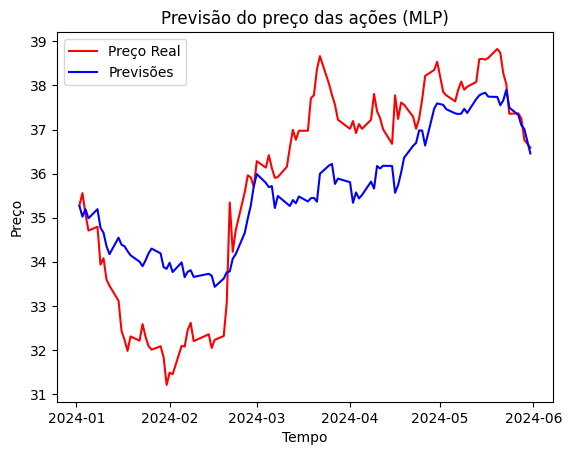

In [ ]:
# Plota o gráfico comparando os preços reais e as previsões do modelo MLP
plt.plot(base_teste.index, base_teste.values, color = 'red', label = 'Preço Real')
# Plota as previsões, usando o índice da base_teste para corresponder ao tempo
# Como as previsões correspondem aos últimos 'len(previsoes)' dias da base_teste, usamos esse slice do índice.
plt.plot(base_teste.index[:len(previsoes)], previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão do preço das ações (MLP)')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
# Salva o gráfico como imagem
plt.savefig('prev_weg.png')
# Exibe o gráfico
plt.show()

In [ ]:
from keras_tuner import HyperParameters
# Define uma função que constrói o modelo MLP com hiperparâmetros ajustáveis
# Esta função será usada pelo Keras Tuner para explorar diferentes combinações de hiperparâmetros.
def build_model(hp):
    regressor = Sequential()
    # Define o número de unidades na primeira camada Dense como um hiperparâmetro inteiro
    # O range de valores vai de 50 a 150 com passos de 10.
    # A função de ativação também é um hiperparâmetro, podendo ser 'relu' ou 'tanh'.
    regressor.add(Dense(units = hp.Int('units_1', min_value = 50, max_value = 150, step = 10), activation = hp.Choice('activation_1', values = ['relu', 'tanh']), input_shape = (previsores.shape[1],))) # Use input_shape
    # Define a taxa de dropout para a primeira camada de Dropout como um hiperparâmetro float
    # O range vai de 0.0 a 0.5 com passos de 0.1.
    regressor.add(Dropout(hp.Float('dropout_1', min_value = 0.0, max_value = 0.5, step = 0.1)))
    # Define o número de unidades na segunda camada Dense e a função de ativação como hiperparâmetros.
    regressor.add(Dense(units = hp.Int('units_2', min_value = 20, max_value = 80, step = 10), activation = hp.Choice('activation_2', values = ['relu', 'tanh'])))
    # Define a taxa de dropout para a segunda camada de Dropout como um hiperparâmetro.
    regressor.add(Dropout(hp.Float('dropout_2', min_value = 0.0, max_value = 0.5, step = 0.1)))
    # Camada de saída com 1 unidade e ativação linear.
    regressor.add(Dense(units = 1, activation = 'linear'))

    # Compila o modelo, definindo o otimizador como um hiperparâmetro ('adam', 'rmsprop', 'sgd')
    # e a função de perda como 'mean_squared_error', com a métrica 'mean_absolute_error'.
    regressor.compile(optimizer = hp.Choice('optimizer', values = ['adam', 'rmsprop', 'sgd']), loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
    return regressor

In [ ]:
# Cria um objeto HyperParameters para definir os espaços de busca dos hiperparâmetros
hp = HyperParameters()
# Define os hiperparâmetros a serem otimizados e seus ranges/opções.
hp.Int('units_1', min_value = 50, max_value = 150, step = 10)
hp.Choice('activation_1', values = ['relu', 'tanh'])
hp.Float('dropout_1', min_value = 0.0, max_value = 0.5, step = 0.1)
hp.Int('units_2', min_value = 20, max_value = 80, step = 10)
hp.Choice('activation_2', values = ['relu', 'tanh'])
hp.Float('dropout_2', min_value = 0.0, max_value = 0.5, step = 0.1)
hp.Choice('optimizer', values = ['adam', 'rmsprop', 'sgd'])

'adam'

In [ ]:
from keras_tuner import RandomSearch
from keras.callbacks import EarlyStopping

# Define um callback de Early Stopping para parar o treinamento se a métrica 'mean_absolute_error'
# não melhorar por 5 épocas consecutivas.
stop_early = EarlyStopping(monitor='mean_absolute_error', patience=5)

# Configura o Keras Tuner com o algoritmo RandomSearch.
# hypermodel: a função que constrói o modelo com hiperparâmetros ajustáveis.
# objective: a métrica a ser otimizada (minimizar o 'mean_absolute_error').
# max_trials: o número total de combinações de hiperparâmetros a serem testadas.
# executions_per_trial: o número de vezes que cada combinação de hiperparâmetros será treinada para reduzir a variância.
# directory: o diretório onde os resultados do tuning serão salvos.
# project_name: o nome do projeto.
tuner = RandomSearch(
    hypermodel=build_model,
    objective='mean_absolute_error',
    max_trials=20,
    executions_per_trial=2,
    directory='my_tuning',
    project_name='stock_prediction'
)

# Inicia o processo de busca de hiperparâmetros.
# O tuner treinará o modelo com diferentes combinações de hiperparâmetros nos dados de treinamento.
# epochs: o número máximo de épocas para treinar cada modelo (Early Stopping irá parar antes se a métrica não melhorar).
# batch_size: o tamanho do batch para o treinamento.
# callbacks: lista de callbacks a serem usados durante o treinamento (neste caso, Early Stopping).
tuner.search(previsores, preco_real, epochs=10000, batch_size=32, callbacks=[stop_early])

Trial 20 Complete [00h 00m 11s]
mean_absolute_error: 0.14267891645431519

Best mean_absolute_error So Far: 0.07953028753399849
Total elapsed time: 00h 03m 17s


In [ ]:
# Obtém os melhores hiperparâmetros encontrados pelo tuner (o top 1).
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Imprime os melhores hiperparâmetros encontrados.
print(f"""
The optimal hyperparameters are:
Units in first dense layer: {best_hps.get('units_1')}
Activation in first dense layer: {best_hps.get('activation_1')}
Dropout rate in first dropout layer: {best_hps.get('dropout_1')}
Units in second dense layer: {best_hps.get('units_2')}
Activation in second dense layer: {best_hps.get('activation_2')}
Dropout rate in second dropout layer: {best_hps.get('dropout_2')}
Optimizer: {best_hps.get('optimizer')}
""")

# Obtém o melhor modelo (a arquitetura com os melhores hiperparâmetros e os pesos treinados).
best_model = tuner.get_best_models(num_models=1)[0]


The optimal hyperparameters are:
Units in first dense layer: 50
Activation in first dense layer: tanh
Dropout rate in first dropout layer: 0.1
Units in second dense layer: 20
Activation in second dense layer: tanh
Dropout rate in second dropout layer: 0.0
Optimizer: adam



/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define Early Stopping para parar o treinamento se a perda de validação ('val_loss')
# não melhorar por 10 épocas consecutivas. Restaura os pesos do modelo com a melhor perda.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define Model Checkpoint para salvar os pesos do modelo ('save_weights_only=True')
# apenas se houver uma melhoria na perda de validação ('monitor='val_loss'').
# O arquivo será salvo como 'best_model_weights.weights.h5'.
model_checkpoint = ModelCheckpoint('best_model_weights.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')


# Treina o melhor modelo com todos os dados de treinamento e os callbacks definidos.
# epochs: número máximo de épocas. Early Stopping irá parar o treinamento antes se a condição for satisfeita.
# batch_size: tamanho do batch.
# callbacks: lista de callbacks a serem usados.
# validation_split: a fração dos dados de treinamento a ser usada como dados de validação.
history = best_model.fit(previsores, preco_real, epochs=10000, batch_size=32, callbacks=[early_stopping, model_checkpoint], validation_split=0.2)

Epoch 1/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0160 - mean_absolute_error: 0.1000 - val_loss: 0.0094 - val_mean_absolute_error: 0.0868
Epoch 2/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.1117 - val_loss: 0.0051 - val_mean_absolute_error: 0.0636
Epoch 3/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0133 - mean_absolute_error: 0.0932 - val_loss: 0.0039 - val_mean_absolute_error: 0.0489
Epoch 4/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0150 - mean_absolute_error: 0.0944 - val_loss: 0.0031 - val_mean_absolute_error: 0.0472
Epoch 5/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0127 - mean_absolute_error: 0.0934 - val_loss: 0.0026 - val_mean_absolute_error: 0.0426
Epoch 6/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0087 - mean_absolute_error: 0.0720 - val_loss: 0.0022 - val_mean_absolute_error: 0.0365
Epoch 7/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0129 - mean_absolute_error: 0.0857 - 

In [ ]:
from sklearn.metrics import mean_absolute_error

# Ajusta o índice para corresponder ao número de previsões
# Pega os valores reais da base de teste que correspondem ao período das previsões.
real = base_teste.values[len(base_teste) - len(previsoes):]

# Cálculo do MAE
# Calcula o Mean Absolute Error entre os valores reais e as previsões.
mae = mean_absolute_error(real, previsoes)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 1.138872971901527


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Absolute Error (MAE) for Optimized Model: 1.0035794698275053


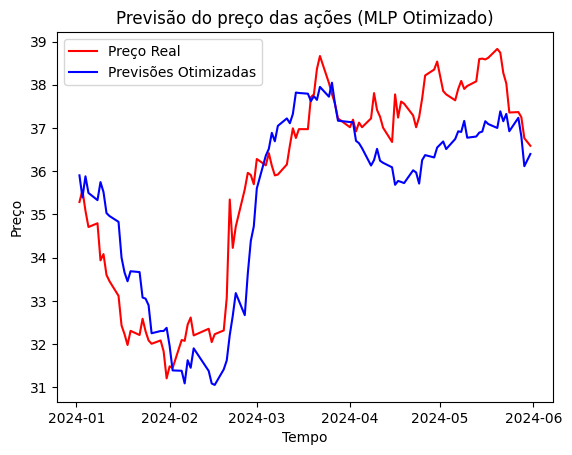

In [ ]:
# Faz previsões com o melhor modelo encontrado pelo tuner.
previsoes_otimizadas = best_model.predict(X_teste)
# Desnormaliza as previsões para a escala de preço original usando o normalizador dos dados de treino.
previsoes_otimizadas = normalizador.inverse_transform(previsoes_otimizadas)

# Ajusta o índice para corresponder ao número de previsões otimizadas
# Pega os valores reais da base de teste que correspondem ao período das previsões otimizadas.
real_otimizado = base_teste.values[len(base_teste) - len(previsoes_otimizadas):]

# Cálculo do MAE para o modelo otimizado
# Calcula o Mean Absolute Error entre os valores reais e as previsões do modelo otimizado.
mae_otimizado = mean_absolute_error(real_otimizado, previsoes_otimizadas)
print(f'Mean Absolute Error (MAE) for Optimized Model: {mae_otimizado}')


# Plota os resultados do modelo otimizado
plt.plot(base_teste.index, base_teste.values, color = 'red', label = 'Preço Real')
# Plota as previsões otimizadas, usando o índice da base_teste para corresponder ao tempo.
plt.plot(base_teste.index[:len(previsoes_otimizadas)], previsoes_otimizadas, color = 'blue', label = 'Previsões Otimizadas') # Ajusta o índice para corresponder às previsões
plt.title('Previsão do preço das ações (MLP Otimizado)')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
# Salva o gráfico.
plt.savefig('prev_weg_optimized.png')
# Exibe o gráfico.
plt.show()

In [ ]:
from keras_tuner import HyperParameters

# Define uma função que constrói um modelo de rede neural LSTM com hiperparâmetros ajustáveis
# Esta função será usada pelo Keras Tuner para otimizar o modelo LSTM.
def build_lstm_model(hp):
    lstm_regressor = Sequential()
    # Adiciona a primeira camada LSTM. O número de unidades, a função de ativação e a taxa de dropout
    # são definidos como hiperparâmetros. return_sequences=True para passar a sequência completa para a próxima camada LSTM.
    # input_shape é definido com base na forma dos dados de entrada (previsores).
    lstm_regressor.add(LSTM(units = hp.Int('lstm_units_1', min_value = 50, max_value = 150, step = 10), activation = hp.Choice('lstm_activation_1', values = ['relu', 'tanh']), return_sequences = True, input_shape = (previsores.shape[1], 1)))
    # Adiciona uma camada de Dropout após a primeira camada LSTM. A taxa de dropout é um hiperparâmetro.
    lstm_regressor.add(Dropout(hp.Float('lstm_dropout_1', min_value = 0.0, max_value = 0.5, step = 0.1)))
    # Adiciona a segunda camada LSTM. O número de unidades e a função de ativação são hiperparâmetros.
    # Não retorna sequências, pois esta é a última camada LSTM antes da camada de saída.
    lstm_regressor.add(LSTM(units = hp.Int('lstm_units_2', min_value = 20, max_value = 80, step = 10), activation = hp.Choice('lstm_activation_2', values = ['relu', 'tanh'])))
    # Adiciona uma camada de Dropout após a segunda camada LSTM. A taxa de dropout é um hiperparâmetro.
    lstm_regressor.add(Dropout(hp.Float('lstm_dropout_2', min_value = 0.0, max_value = 0.5, step = 0.1)))
    # Adiciona a camada de saída com 1 unidade e ativação linear para prever um valor contínuo.
    lstm_regressor.add(Dense(units = 1, activation = 'linear'))

    # Compila o modelo LSTM. O otimizador é um hiperparâmetro, e a função de perda e a métrica são definidas.
    lstm_regressor.compile(optimizer = hp.Choice('lstm_optimizer', values = ['adam', 'rmsprop', 'sgd']), loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
    return lstm_regressor

In [ ]:
# Cria um objeto HyperParameters para definir os espaços de busca dos hiperparâmetros para o modelo LSTM.
lstm_hp = HyperParameters()
# Define os hiperparâmetros do modelo LSTM a serem otimizados e seus ranges/opções.
lstm_hp.Int('lstm_units_1', min_value = 50, max_value = 150, step = 10)
lstm_hp.Choice('lstm_activation_1', values = ['relu', 'tanh'])
lstm_hp.Float('lstm_dropout_1', min_value = 0.0, max_value = 0.5, step = 0.1)
lstm_hp.Int('lstm_units_2', min_value = 20, max_value = 80, step = 10)
lstm_hp.Choice('lstm_activation_2', values = ['relu', 'tanh'])
lstm_hp.Float('lstm_dropout_2', min_value = 0.0, max_value = 0.5, step = 0.1)
lstm_hp.Choice('lstm_optimizer', values = ['adam', 'rmsprop', 'sgd'])

'adam'

In [ ]:
# Define a arquitetura da rede neural LSTM (Baseline)
lstm_regressor_baseline = Sequential()
# Adiciona a primeira camada LSTM com 60 unidades, ativação 'relu' e retorno de sequências
# O input_shape é (janela_de_tempo, 1), onde janela_de_tempo é o número de dias que estamos olhando para trás (90)
lstm_regressor_baseline.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (previsores.shape[1], 1)))
# Adiciona uma camada de Dropout para regularização
lstm_regressor_baseline.add(Dropout(0.2))
# Adiciona a segunda camada LSTM com 60 unidades e ativação 'relu'
# Não retorna sequências, pois esta é a última camada LSTM antes da camada de saída
lstm_regressor_baseline.add(LSTM(units = 60, activation = 'relu'))
# Adiciona outra camada de Dropout para regularização
lstm_regressor_baseline.add(Dropout(0.2))
# Adiciona a camada de saída com 1 unidade e ativação linear (para prever um valor contínuo)
lstm_regressor_baseline.add(Dense(units = 1, activation = 'linear'))

# Compila o modelo LSTM (Baseline)
lstm_regressor_baseline.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
# Treina o modelo com os dados preparados
lstm_regressor_baseline.fit(previsores, preco_real, epochs = 100, batch_size = 32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - loss: 0.2489 - mean_absolute_error: 0.4585
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.1689 - mean_absolute_error: 0.3609
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0752 - mean_absolute_error: 0.2197
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0431 - mean_absolute_error: 0.1691
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0304 - mean_absolute_error: 0.1287
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0294 - mean_absolute_error: 0.1295
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0257 - mean_absolute_error: 0.1188
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0273 - mean_absolute_error: 0.1301
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0224 - mean_absolute_error: 0.1123
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0236 - mean_absolute_error: 0.1171
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/

In [ ]:
# Faz previsões com o modelo LSTM baseline
previsoes_lstm_baseline = lstm_regressor_baseline.predict(X_teste)
# Desnormaliza as previsões para a escala original
previsoes_lstm_baseline = normalizador.inverse_transform(previsoes_lstm_baseline)

# Extrai os preços reais correspondentes às previsões
# Pega os últimos 'len(previsoes_lstm_baseline)' valores da base_teste
real_lstm_baseline = base_teste.values[len(base_teste) - len(previsoes_lstm_baseline):]

# Calcula o Erro Médio Absoluto (MAE) para o modelo LSTM baseline
mae_lstm_baseline = mean_absolute_error(real_lstm_baseline, previsoes_lstm_baseline)
print(f'Mean Absolute Error (MAE) for Baseline LSTM Model: {mae_lstm_baseline}')

2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step
Mean Absolute Error (MAE) for Baseline LSTM Model: 0.6617526091062106


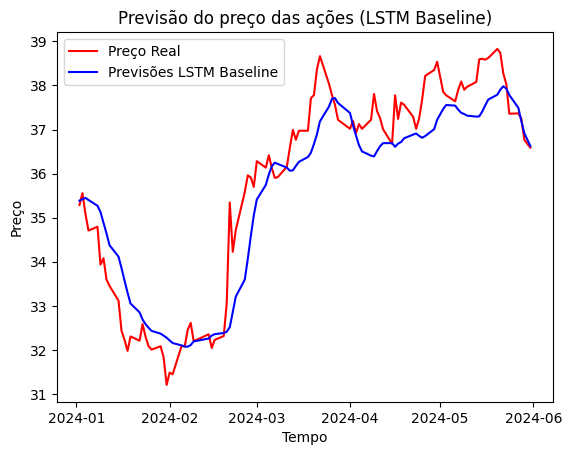

In [ ]:
# Plota o gráfico comparando os preços reais e as previsões do modelo LSTM baseline
plt.plot(base_teste.index, base_teste.values, color = 'red', label = 'Preço Real')
# Plota as previsões, usando o índice da base_teste para corresponder ao tempo
plt.plot(base_teste.index[:len(previsoes_lstm_baseline)], previsoes_lstm_baseline, color = 'blue', label = 'Previsões LSTM Baseline')
plt.title('Previsão do preço das ações (LSTM Baseline)')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
# Salva o gráfico como imagem
plt.savefig('prev_weg_lstm_baseline.png')
# Exibe o gráfico
plt.show()

In [ ]:
from keras_tuner import RandomSearch
from keras.callbacks import EarlyStopping

# Define um callback de Early Stopping para o tuner LSTM, parando o treinamento se o MAE não melhorar por 5 épocas.
stop_early = EarlyStopping(monitor='mean_absolute_error', patience=5)

# Configura o Keras Tuner com o algoritmo RandomSearch para o modelo LSTM.
# hypermodel: a função que constrói o modelo LSTM.
# objective: a métrica a ser otimizada (MAE).
# max_trials: número total de combinações de hiperparâmetros LSTM a serem testadas.
# executions_per_trial: número de vezes que cada combinação será treinada.
# directory: diretório para salvar os resultados do tuning LSTM.
# project_name: nome do projeto.
tuner_lstm = RandomSearch(
    hypermodel=build_lstm_model,
    objective='mean_absolute_error',
    max_trials=20,
    executions_per_trial=2,
    directory='my_tuning_lstm',
    project_name='stock_prediction_lstm'
)

# Inicia o processo de busca de hiperparâmetros para o modelo LSTM.
# O tuner treinará o modelo LSTM com diferentes combinações nos dados de treinamento.
# epochs: número máximo de épocas (Early Stopping irá parar antes).
# batch_size: tamanho do batch.
# callbacks: lista de callbacks (Early Stopping).
tuner_lstm.search(previsores, preco_real, epochs=10000, batch_size=32, callbacks=[stop_early])

Trial 20 Complete [00h 01m 04s]
mean_absolute_error: 0.07443056255578995

Best mean_absolute_error So Far: 0.0643107146024704
Total elapsed time: 00h 20m 11s


In [ ]:
# Obtém os melhores hiperparâmetros encontrados pelo tuner para o modelo LSTM (o top 1).
best_hps_lstm = tuner_lstm.get_best_hyperparameters(num_trials=1)[0]

# Imprime os melhores hiperparâmetros LSTM encontrados.
print(f"""
The optimal LSTM hyperparameters are:
Units in first LSTM layer: {best_hps_lstm.get('lstm_units_1')}
Activation in first LSTM layer: {best_hps_lstm.get('lstm_activation_1')}
Dropout rate in first LSTM dropout layer: {best_hps_lstm.get('lstm_dropout_1')}
Units in second LSTM layer: {best_hps_lstm.get('lstm_units_2')}
Activation in second LSTM layer: {best_hps_lstm.get('lstm_activation_2')}
Dropout rate in second LSTM dropout layer: {best_hps_lstm.get('lstm_dropout_2')}
Optimizer: {best_hps_lstm.get('lstm_optimizer')}
""")

# Obtém o melhor modelo LSTM (a arquitetura com os melhores hiperparâmetros e os pesos treinados).
best_lstm_model = tuner_lstm.get_best_models(num_models=1)[0]


The optimal LSTM hyperparameters are:
Units in first LSTM layer: 110
Activation in first LSTM layer: tanh
Dropout rate in first LSTM dropout layer: 0.1
Units in second LSTM layer: 50
Activation in second LSTM layer: tanh
Dropout rate in second LSTM dropout layer: 0.0
Optimizer: adam



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define Early Stopping para o modelo LSTM
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define Model Checkpoint para salvar os pesos do modelo LSTM
model_checkpoint_lstm = ModelCheckpoint('best_lstm_model_weights.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')

# Treina o melhor modelo LSTM com todos os dados de treino e callbacks
history_lstm = best_lstm_model.fit(previsores, preco_real, epochs=10000, batch_size=32, callbacks=[early_stopping_lstm, model_checkpoint_lstm], validation_split=0.2)

Epoch 1/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 567ms/step - loss: 0.0182 - mean_absolute_error: 0.1043 - val_loss: 0.0067 - val_mean_absolute_error: 0.0714
Epoch 2/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 0.0209 - mean_absolute_error: 0.1092 - val_loss: 0.0042 - val_mean_absolute_error: 0.0549
Epoch 3/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - loss: 0.0119 - mean_absolute_error: 0.0841 - val_loss: 0.0015 - val_mean_absolute_error: 0.0298
Epoch 4/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - loss: 0.0120 - mean_absolute_error: 0.0908 - val_loss: 0.0017 - val_mean_absolute_error: 0.0352
Epoch 5/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: 0.0102 - mean_absolute_error: 0.0749 - val_loss: 0.0043 - val_mean_absolute_error: 0.0567
Epoch 6/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 0.0097 - mean_absolute_error: 0.0748 - val_loss: 0.0020 - val_mean_absolute_error: 0.0379
Epoch 7/10000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 0.0101 - mean_absolute_error: 0.0

In [ ]:
# Faz previsões com o modelo LSTM otimizado
previsoes_lstm_otimizadas = best_lstm_model.predict(X_teste)
# Desnormaliza as previsões para a escala original
previsoes_lstm_otimizadas = normalizador.inverse_transform(previsoes_lstm_otimizadas)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


In [ ]:
# Extrai os preços reais correspondentes às previsões para o modelo LSTM otimizado
real_lstm_otimizado = base_teste.values[len(base_teste) - len(previsoes_lstm_otimizadas):]

# Calcula o Erro Médio Absoluto (MAE) para o modelo LSTM otimizado
mae_lstm_otimizado = mean_absolute_error(real_lstm_otimizado, previsoes_lstm_otimizadas)
print(f'Mean Absolute Error (MAE) for Optimized LSTM Model: {mae_lstm_otimizado}')

Mean Absolute Error (MAE) for Optimized LSTM Model: 0.5620807134188138


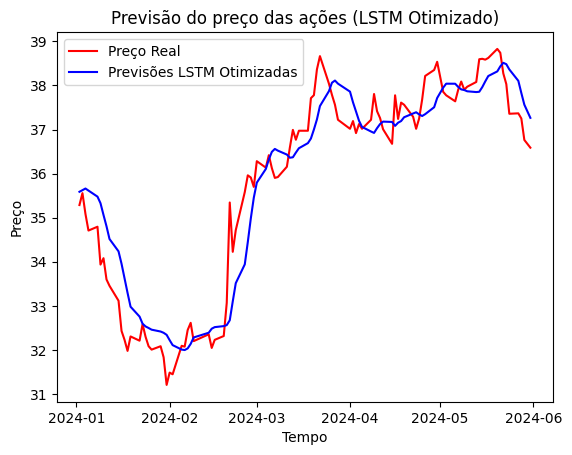

In [ ]:
# Plota os resultados
plt.plot(base_teste.index, base_teste.values, color = 'red', label = 'Preço Real')
# Plota as previsões do modelo LSTM otimizado, ajustando o índice para corresponder às previsões
plt.plot(base_teste.index[:len(previsoes_lstm_otimizadas)], previsoes_lstm_otimizadas, color = 'blue', label = 'Previsões LSTM Otimizadas')
plt.title('Previsão do preço das ações (LSTM Otimizado)')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.savefig('prev_weg_lstm_optimized.png')
plt.show()